### Import Library & Set Random Seed

In [1]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install Sastrawi
!pip install swifter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import swifter
import re
import gensim
import tensorflow as tf
import keras
import multiprocessing
import os.path
import requests
import argparse
import sys

# from numpy.random import seed
# seed(12345)
# import tensorflow as tf
# tf.random.set_seed(12345)
# from tensorflow import keras

from wordcloud import WordCloud, STOPWORDS

nltk.download('punkt')
nltk.download('stopwords')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


from tensorflow.keras import layers, metrics, optimizers
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, Dropout, MaxPool1D, GlobalMaxPooling1D, Embedding, Activation, Input, Flatten, Lambda, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import TimeDistributed, Bidirectional, SpatialDropout1D, BatchNormalization, concatenate, Layer
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax, Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from numpy import dot
from numpy.linalg import norm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import random


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: '#'



[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: '#'



[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import re 
import gensim
import multiprocessing
import os.path
import requests
import argparse
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import sys

stopword = nltk.corpus.stopwords.words('indonesian')
stopword = [e for e in stopword if e not in ('akankah', 'apa', 'apakah', 'bagaimana', 'bagaimanakah', 'beberapa', 'begini', 'beginilah', 'benarkah', 'berapa', 'berapakah', 'berikut', 'bisakah', 'bolehkah', 'cara', 'hal', 'ini', 'inikah', 'inilah', 'kapan', 'kapankah', 'kok', 'mengapa', 'menurut', 'mungkinkah', 'pentingnya', 'siapa', 'siapakah', 'waduh', 'wah')]

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
  stemmed_list = []
  for x in term:
    stemmed_list.append(stemmer.stem(x))
  return stemmed_list

def remove_stopwords(text):
	text = [word for word in text if word not in stopword]
	return text

def tokenization(text):
	text = re.split('\W+', text)
	return text

def cleaning_text(text):
    # Menghilangkan baris baru, tab, underline.
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # Ambil 3 Kalimat
    text = ' '.join(re.split(r'(?<=[.:;])\s', text)[:3])
    # Menghilangkan simbol emoticon dan huruf selain ascii
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus mention (@), link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove_empty_space
    text = re.sub(r'', '', text.strip())
    # remove number
    text = re.sub("\d+", "", text)
    #remove multiple space
    text = re.sub(r'\s\s+', ' ', text)
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

In [3]:
np.random.seed(37)

random.seed(1254)

tf.random.set_seed(89)

### Pre-trained 100000 Data Artikel dari IdWiki

In [4]:
# import re 
# import gensim
# import multiprocessing
# import os.path
# import requests
# import argparse
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# import sys

# def download(link, file_name):
#     with open(file_name, "wb") as f:
#         print("Downloading %s" % file_name)
#         response = requests.get(link, stream=True)
#         total_length = response.headers.get('content-length')

#         if total_length is None: # no content length header
#             f.write(response.content)
#         else:
#             dl = 0
#             total_length = int(total_length)
#             for data in response.iter_content(chunk_size=4096):
#                 dl += len(data)
#                 f.write(data)
#                 done = int(50 * dl / total_length)
#                 sys.stdout.write("\r[%s%s]" % ('=' * done, ' ' * (50-done)) )
#                 sys.stdout.flush()

# def get_id_wiki(dump_path):
#     if not os.path.isfile(dump_path):
#         url = 'https://dumps.wikimedia.org/idwiki/latest/idwiki-latest-pages-articles.xml.bz2'
#         download(url, dump_path)
#     return gensim.corpora.WikiCorpus(dump_path, dictionary={})

# def extract_text(extracted_path, id_wiki, stem, limit_articles):
#     if os.path.isfile(extracted_path):
#         return None
#     if stem:
#         print('Warning : Using stemmer could slow down the extracting progress')
#         stemmer = StemmerFactory().create_stemmer()
#     with open(extracted_path, 'w') as f:
#         i = 0
#         for text in id_wiki.get_texts():
#             text = ' '.join(text)
#             text = stemmer.stem(text) if stem else text
#             f.write(text + '\n', encoding="utf-8")
#             i += 1
#             if i%(10 if stem else 1000) == 0:
#                 if int(i) == limit_articles:
#                   return None
#                 print(str(i), 'articles processed')
#         print('total:', str(i))
#     return None

# def main():
#     model_path = 'idwiki_word2vec100.model'
#     extracted_path = 'idwiki100.txt'
#     dump_path = 'idwiki-latest-pages-articles.xml.bz2'
#     dim = 100
#     stem = False
#     limit_articles = 100000
#     id_wiki = get_id_wiki(dump_path)
#     print('Extracting text...')
#     extract_text(extracted_path, id_wiki, stem, limit_articles)

# def str2bool(v):
#     if v.lower() in ('yes', 'true', 't', 'y', '1'):
#         return True
#     elif v.lower() in ('no', 'false', 'f', 'n', '0'):
#         return False
#     else:
#         raise argparse.ArgumentTypeError('Boolean value expected.')

# if __name__ == '__main__':
#     main()

### Menggabungkan Dataset asli dengan data Idwiki

In [5]:
# df = pd.read_csv("Data Clean Tanpa Stemming.csv", encoding="latin-1")

In [6]:
# def append_multiple_lines(file_name, lines_to_append):
#     # Open the file in append &amp; read mode ('a+')
#     with open(file_name, "a+") as file_object:
#         appendEOL = False
#         # Move read cursor to the start of file.
#         file_object.seek(0)
#         # Check if file is not empty
#         data = file_object.read(100)
#         if len(data) != 0:
#             appendEOL = True
#         # Iterate over each string in the list
#         for line in lines_to_append:
#             # If file is not empty then append '\n' before first line for
#             # other lines always append '\n' before appending line
#             if appendEOL == True:
#                 file_object.write("\n")
#             else:
#                 appendEOL = True
#             # Append element at the end of file
#             file_object.write(line)            
 
# all_texts = df["Judul"].tolist() + df["Isi Berita"].tolist()
# append_multiple_lines('idwiki100.txt', all_texts)

### Create Model

In [7]:
# def build_model(extracted_path, model_path, dim):
#     sentences = gensim.models.word2vec.LineSentence(extracted_path)
#     id_w2v = gensim.models.word2vec.Word2Vec(sentences, size=dim, window = 5, workers=multiprocessing.cpu_count()-1)
#     id_w2v.save(model_path)
#     return id_w2v
 
# model_path = 'idwiki_word2vec100.model'
# extracted_path = 'idwiki100.txt'
# dim = 100
# print('Build a model...')
# build_model(extracted_path, model_path, dim)
# print('Saved model:', model_path) 

### Load Model Word2Vec

In [8]:
path = 'idwiki_word2vec200.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
id_w2v.wv.most_similar('raja')

[('kerajaan', 0.6991432905197144),
 ('rajanya', 0.6931381225585938),
 ('penguasa', 0.6792371273040771),
 ('maharaja', 0.6785883903503418),
 ('firaun', 0.6699469089508057),
 ('kertanagara', 0.6185320615768433),
 ('ratu', 0.6140453219413757),
 ('permaisuri', 0.6066007614135742),
 ('bertakhta', 0.6034725308418274),
 ('ptolemaios', 0.5906604528427124)]

### Tokenizer Data

In [9]:
df_train = pd.read_csv("df_train.csv", encoding="latin-1")
df_test = pd.read_csv("df_test.csv", encoding="latin-1")

In [10]:
MAX_LEN = -1
for doc in df_train["Judul"]+df_train["Isi Berita"]:
    tokens = nltk.word_tokenize(doc)
    if(MAX_LEN<len(tokens)):
        MAX_LEN = len(tokens)
print("The maximum number of words in any document is =", MAX_LEN)

The maximum number of words in any document is = 392


In [11]:
all_texts = df_train["Judul"].tolist() + df_train["Isi Berita"].tolist()

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_texts)

In [13]:
title_train = tokenizer.texts_to_sequences(df_train["Judul"].tolist())
content_train = tokenizer.texts_to_sequences(df_train["Isi Berita"].tolist())

title_test = tokenizer.texts_to_sequences(df_test["Judul"].tolist())
content_test = tokenizer.texts_to_sequences(df_test["Isi Berita"].tolist())

In [14]:
title_train = pad_sequences(title_train, MAX_LEN)
content_train = pad_sequences(content_train, MAX_LEN)

title_test = pad_sequences(title_test, MAX_LEN)
content_test = pad_sequences(content_test, MAX_LEN)

### Load Model Word2Vec & Cek Semantik Kata

In [15]:
### w2v_model cara lama diganti dengan load model
vocab_size = len(tokenizer.word_index) + 1
DIM = 200
vocab = tokenizer.word_index
# w2v_model = gensim.models.Word2Vec(sentences_split, size=DIM, min_count =1, window=5)
path = 'idwiki_word2vec200.model'
w2v_model = gensim.models.word2vec.Word2Vec.load(path)
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))
  for word, i in vocab.items():
    try:
      vec = model.wv[word]
    except:
      vec = None
    if vec is not None:
      weight_matrix[i] = vec
  return weight_matrix
embedding_vectors = get_weight_matrix(w2v_model)
embedding_vectors.shape

(15337, 200)

In [16]:
w2v_model.wv.most_similar('omicron')

[('covid', 0.7599523067474365),
 ('kemenkes', 0.5891228914260864),
 ('lonjakan', 0.5673922300338745),
 ('sars', 0.5667186379432678),
 ('hiv', 0.5589964389801025),
 ('cegah', 0.5531119108200073),
 ('virus', 0.5439670085906982),
 ('waspadai', 0.5180369019508362),
 ('vaksin', 0.5165814757347107),
 ('varian', 0.5050985217094421)]

In [17]:
w2v_model.wv.doesnt_match(['omicron', 'covid', 'sirup'])

'sirup'

In [18]:
w2v_model.wv.doesnt_match(['omicron', 'covid', 'vaksin', 'kursi'])

'kursi'

### Pemodelan Bi-LSTM

#### Bi-LSTM + Cosine

In [19]:
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional, SpatialDropout1D
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate, Layer
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda, GRU
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax, Adam
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K

import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from numpy import dot
from numpy.linalg import norm
from keras.backend import int_shape
from keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils

import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [20]:
# # X = [title_train, content_train]
X_train = np.hstack((title_train, content_train))
X_train

array([[    0,     0,     0, ...,   836,    46,   106],
       [    0,     0,     0, ...,   744,  3711,  4909],
       [    0,     0,     0, ...,   266,    43,  9318],
       ...,
       [    0,     0,     0, ..., 15334, 15335, 15336],
       [    0,     0,     0, ...,  2051,    12,   541],
       [    0,     0,     0, ...,    16,    16,  2967]])

In [21]:
X_train.shape

(2815, 784)

In [22]:
y_train = df_train['Label']
y_train

0       0
1       0
2       0
3       0
4       1
       ..
2810    0
2811    0
2812    1
2813    0
2814    1
Name: Label, Length: 2815, dtype: int64

In [23]:
# # X = [title_train, content_train]
X_test = np.hstack((title_test, content_test))
X_test

array([[   0,    0,    0, ...,  943,   51,   56],
       [   0,    0,    0, ...,    1,   51,   56],
       [   0,    0,    0, ..., 4708, 5749,  718],
       ...,
       [   0,    0,    0, ..., 1428,  273,    7],
       [   0,    0,    0, ...,  147,  103,  849],
       [   0,    0,    0, ...,  383,   23, 2183]])

In [24]:
X_test.shape

(704, 784)

In [25]:
y_test = df_test['Label']
y_test

0      0
1      0
2      0
3      0
4      0
      ..
699    1
700    0
701    0
702    1
703    0
Name: Label, Length: 704, dtype: int64

In [26]:
print ("SMOTE TRAIN")
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

print ("SMOTE TRAIN")
print("Before OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test == 0)))

X_test, y_test = sm.fit_resample(X_test, y_test)

print('After OverSampling, the shape of train_X: {}'.format(X_test.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test == 0)))

SMOTE TRAIN
Before OverSampling, counts of label '1': 625
Before OverSampling, counts of label '0': 2190 

After OverSampling, the shape of train_X: (4380, 784)
After OverSampling, the shape of train_y: (4380,) 

After OverSampling, counts of label '1': 2190
After OverSampling, counts of label '0': 2190
SMOTE TRAIN
Before OverSampling, counts of label '1': 156
Before OverSampling, counts of label '0': 548 

After OverSampling, the shape of train_X: (1096, 784)
After OverSampling, the shape of train_y: (1096,) 

After OverSampling, counts of label '1': 548
After OverSampling, counts of label '0': 548


In [27]:
X_train = np.hsplit(X_train,2)

In [28]:
X_train

[array([[   0,    0,    0, ...,  391,  998, 1420],
        [   0,    0,    0, ...,  672,   11, 1860],
        [   0,    0,    0, ...,  103,  739,   12],
        ...,
        [   0,    0,    0, ...,   35,   43,  134],
        [   0,    0,    0, ..., 2098,  502,  481],
        [   0,    0,    0, ...,    8,   86,    5]]),
 array([[   0,    0,    0, ...,  836,   46,  106],
        [   0,    0,    0, ...,  744, 3711, 4909],
        [   0,    0,    0, ...,  266,   43, 9318],
        ...,
        [   0,    0,    0, ...,  213,  540,   54],
        [   0,    0,    0, ...,  837,  627, 2751],
        [   0,    0,    0, ..., 7229, 4128,  402]])]

In [29]:
X_test = np.hsplit(X_test,2)

In [30]:
X_test

[array([[   0,    0,    0, ...,  108,    9,    8],
        [   0,    0,    0, ...,  142,  414,    2],
        [   0,    0,    0, ..., 1631,  617, 2428],
        ...,
        [   0,    0,    0, ...,  415,  479, 1144],
        [   0,    0,    0, ...,  297,   44,  114],
        [   0,    0,    0, ..., 1764,  850,  748]]),
 array([[   0,    0,    0, ...,  943,   51,   56],
        [   0,    0,    0, ...,    1,   51,   56],
        [   0,    0,    0, ..., 4708, 5749,  718],
        ...,
        [   0,    0,    0, ..., 1620, 2176,   12],
        [   0,    0,    0, ...,   44,  814,  335],
        [   0,    0,    0, ..., 2769,  498,  287]])]

In [31]:
# ytrain = tf.keras.utils.to_categorical(y, num_classes=2)
ytrain = tf.keras.utils.to_categorical(y_train, num_classes=2)
ytest = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [32]:
def bilstm_siamese_model():

  input_left = Input(shape=(None,), dtype="int64")
  input_right = Input(shape=(None,), dtype="int64")

  embedding_layer = Embedding(vocab_size, DIM, embeddings_initializer=keras.initializers.Constant(embedding_vectors), 
                              trainable=False)
  
  lstm_sub_net = Sequential()
  lstm_sub_net(Input(shape=(None,)))
  lstm_sub_net.add(Bidirectional(LSTM(128,return_sequences=True), input_shape = (None,200)))
  lstm_sub_net.add(Bidirectional(LSTM(128)))
  
  # sub_net = Sequential()
  # sub_net.add(Conv1D(50, 9, activation="relu", padding='same', input_shape = (None, 150)))

  input_encoded_left = embedding_layer(input_left)
  input_encoded_right = embedding_layer(input_right)

  # left_encoding = sub_net(input_encoded_left)
  # right_encoding = sub_net(input_encoded_right)
  left_encoding = lstm_sub_net(tf.concat([input_encoded_left], axis = 1))
  right_encoding = lstm_sub_net(tf.concat([input_encoded_right], axis = 1))

  # L1_distance = tf.keras.layers.Dot(axes=-1, normalize=True, name='cosine',
  #                   dtype=tf.float64)([left_encoding, right_encoding])

  L1_distance = tf.keras.layers.Dot(axes=-1, normalize=True, name='cosine')([left_encoding, right_encoding])

  predictor = Sequential()
  predictor.add(Dense(2))
  predictor.add(Dropout(0.3))
  predictor.add(Activation('softmax'))

  prediction = predictor(L1_distance)

  model = Model(inputs=[input_left,input_right], outputs=prediction)
  #model.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.0001), metrics=["acc"])
  model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])
  model.summary()
  return model

In [33]:
model = bilstm_siamese_model()

# ytrain = np_utils.to_categorical(y_train)
# ytest = np_utils.to_categorical(y_test)

# checkpoints_smote = ModelCheckpoint('smote_weights.hdf5', monitor="val_acc", mode="max", verbose=True, save_best_only=True)

def lr_scheduler(epoch):
    return 0.01 * 0.9 ** epoch

class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

history = model.fit(
    X_train, ytrain, 
    batch_size=32, 
    epochs=10,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),LrHistory(),EarlyStopping(monitor='loss', patience=5)],
    validation_data=([X_test],ytest),
    verbose=1,
    initial_epoch = 0
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 200)    3067400     ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 tf.identity (TFOpLambda)       (None, None, 200)    0           ['embedding[0][0]']          

In [34]:
model_filename = 'modelfinal.hdf5'
model.save(model_filename)
model = tf.keras.models.load_model(model_filename)

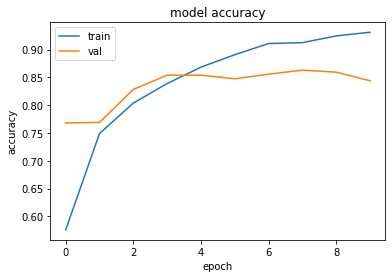

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

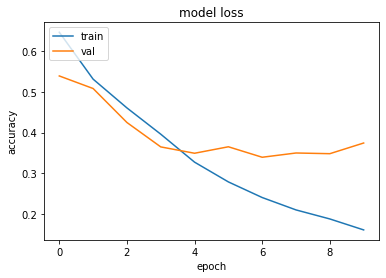

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
judul = "Polisi Menangkap Pelaku Pemukulan Anak Anggota DPR"
content = """Polisi telah menangkap Faisal Marasabessy, anak dari Ali Fanser Marasabessy, selaku pelaku pemukulan kepada Justin Frederick. Korban diketahui sebagai anak anggota DPR bernama Indah Kurniawati.
Faisal ikut ditampilkan saat Polda Metro Jaya menggelar konferensi pers kasus itu siang ini, Senin (6/6/2022). Faisal Marasabessy tampak telah menggunakan baju tahanan berwarna oranye.
Tidak ada komentar yang keluar dari mulut Faisal. Tangannya pun diikat tali ties."""
judul = cleaning_text(judul)
content = cleaning_text(content)

judul = tokenization(judul.lower())
content = tokenization(content.lower())

judul = remove_stopwords(judul)
content = remove_stopwords(content)

# judul = stemmed_wrapper(judul)
# content = stemmed_wrapper(content)

judul = " ".join(judul)
content = " ".join(content)

# clean_judul = [" ".join(judul.split())]
# clean_content = [" ".join(content.split())]
clean_judul = [" ".join(judul.split()[:20])]
clean_content = [" ".join(content.split()[:20])]
print(clean_judul)
print(clean_content)

['polisi menangkap pelaku pemukulan anak anggota dpr']
['polisi menangkap faisal marasabessy anak ali fanser marasabessy pelaku pemukulan justin frederick korban anak anggota dpr bernama indah kurniawati faisal']


In [38]:
clean_judul = tokenizer.texts_to_sequences(clean_judul)
clean_judul = pad_sequences(clean_judul,maxlen=MAX_LEN)

clean_content = tokenizer.texts_to_sequences(clean_content)
clean_content = pad_sequences(clean_content,maxlen=MAX_LEN)

In [39]:
coba_predicted = model.predict([clean_judul, clean_content])
print("hasil predict ", coba_predicted)
if coba_predicted[0][0] < 0.5:
    print("clickbait")
else:
    print("non-clickbait")

1/1 [==============================] - 2s 2s/step
hasil predict  [[0.934765   0.06523503]]
non-clickbait


In [40]:
predict_test = model.predict([X_test])
# [title_test, content_test],y_test]

35/35 [==============================] - 50s 1s/step


In [41]:
predict_test

array([[0.9680712 , 0.03192885],
       [0.9522559 , 0.04774405],
       [0.96819836, 0.0318016 ],
       ...,
       [0.00975961, 0.99024045],
       [0.01241112, 0.98758894],
       [0.009263  , 0.990737  ]], dtype=float32)

In [42]:
y_pred=np.argmax(predict_test, axis=1)
y_testp=np.argmax(ytest, axis=1)

In [43]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_testp, y_pred)

print(cf_matrix)
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

[[465  83]
 [ 88 460]]


In [44]:
accuracy = (TN+TP)/(TN+FP+TP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
print("accuracy ",accuracy)
print("precision ",precision)
print("recall ", recall)
print("f1_score ",f1_score)

accuracy  0.843978102189781
precision  0.8471454880294659
recall  0.8394160583941606
f1_score  0.8432630614115488


### Bi-LSTM with CNN + Cosi

In [45]:
#Model mengambil input sepasang kalimat (title & content) dan mengeluarkan output similarity score dari kedua makna sepasang kalimat tersebut
def bilstm_siamese_model2():

  #inisiasi dua input dengan shape none
  input_left = Input(shape=(None,), dtype="int64")
  input_right = Input(shape=(None,), dtype="int64")

  # Menggunakan w2vec gensim untuk mengahsilkan matriks dari kalimat yang diinputkan kedalam embbeding sebagai representasi kata, sebelum dimasukkan ke jaringan.
  embedding_layer = Embedding(vocab_size, DIM, embeddings_initializer=keras.initializers.Constant(embedding_vectors), 
                              trainable=False)
  input_encoded_left = embedding_layer(input_left)
  input_encoded_right = embedding_layer(input_right)

  # Jaringan CNN berfungsi untuk mengumpulkan beberapa konteks kata-kata terdekat untuk membuat embbeding yang lebih kaya dan akurat
  sub_net = Sequential()
  sub_net.add(Conv1D(50, 9, activation="relu", padding='same', input_shape = (None, 200)))
  left_encoding = sub_net(input_encoded_left)
  right_encoding = sub_net(input_encoded_right)

  # Jaringan BiLSTM berfungsi untuk menghasilkan embbeding representasi dari keseluruhan kalimat
  lstm_sub_net = Sequential()
  lstm_sub_net(Input(shape=(None,)))
  lstm_sub_net.add(Bidirectional(LSTM(128,return_sequences=True), input_shape = (None,250)))
  lstm_sub_net.add(Bidirectional(LSTM(128)))

  # proses jaringan cnn & bilstm bekerja
  left_encoding = lstm_sub_net(tf.concat([input_encoded_left, left_encoding], axis = 2))
  right_encoding = lstm_sub_net(tf.concat([input_encoded_right, right_encoding], axis = 2))

  # Layer Dot digunakan untuk menghitung jarak kesamaan diantara 2 tensor
  L1_distance = tf.keras.layers.Dot(axes=-1, normalize=True, name='cosine')([left_encoding, right_encoding])

  # Prediksi jarak kedua tensor kedalam 2 dense [non-clickbait, clickbait]
  predictor = Sequential()
  predictor.add(Dense(2))
  predictor.add(Dropout(0.3))
  predictor.add(Activation('softmax'))

  prediction = predictor(L1_distance)

  model = Model(inputs=[input_left,input_right], outputs=prediction)
  model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])
  model.summary()
  return model

In [46]:
model = bilstm_siamese_model2()

# ytrain = np_utils.to_categorical(y_train)
# ytest = np_utils.to_categorical(y_test)

# checkpoints_smote = ModelCheckpoint('smote_weights.hdf5', monitor="val_acc", mode="max", verbose=True, save_best_only=True)

def lr_scheduler(epoch):
    return 0.01 * 0.9 ** epoch

class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

history = model.fit(
    X_train, ytrain, 
    batch_size=32, 
    epochs=10,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),LrHistory(),EarlyStopping(monitor='loss', patience=5)],
    validation_data=([X_test],ytest),
    verbose=1,
    initial_epoch = 0
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 200)    3067400     ['input_4[0][0]',                
                                                                  'input_5[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, None, 50)     90050       ['embedding_1[0][0]',      

In [47]:
model_filename = 'modelfinal2.hdf5'
model.save(model_filename)
model = tf.keras.models.load_model(model_filename)

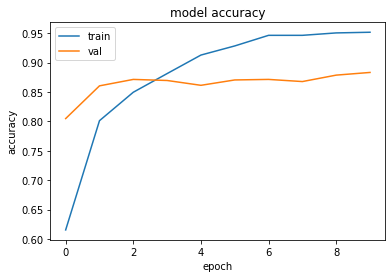

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

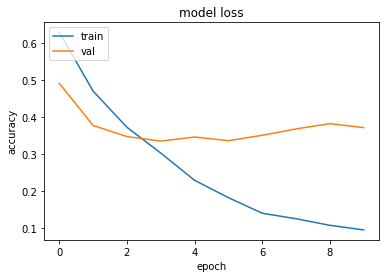

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
judul = "Polisi Menangkap Pelaku Pemukulan Anak Anggota DPR"
content = """Polisi telah menangkap Faisal Marasabessy, anak dari Ali Fanser Marasabessy, selaku pelaku pemukulan kepada Justin Frederick. Korban diketahui sebagai anak anggota DPR bernama Indah Kurniawati.
Faisal ikut ditampilkan saat Polda Metro Jaya menggelar konferensi pers kasus itu siang ini, Senin (6/6/2022). Faisal Marasabessy tampak telah menggunakan baju tahanan berwarna oranye.
Tidak ada komentar yang keluar dari mulut Faisal. Tangannya pun diikat tali ties."""
judul = cleaning_text(judul)
content = cleaning_text(content)

judul = tokenization(judul.lower())
content = tokenization(content.lower())

judul = remove_stopwords(judul)
content = remove_stopwords(content)

# judul = stemmed_wrapper(judul)
# content = stemmed_wrapper(content)

judul = " ".join(judul)
content = " ".join(content)

# clean_judul = [" ".join(judul.split())]
# clean_content = [" ".join(content.split())]
clean_judul = [" ".join(judul.split()[:20])]
clean_content = [" ".join(content.split()[:20])]
print(clean_judul)
print(clean_content)

['polisi menangkap pelaku pemukulan anak anggota dpr']
['polisi menangkap faisal marasabessy anak ali fanser marasabessy pelaku pemukulan justin frederick korban anak anggota dpr bernama indah kurniawati faisal']


In [51]:
clean_judul = tokenizer.texts_to_sequences(clean_judul)
clean_judul = pad_sequences(clean_judul,maxlen=MAX_LEN)

clean_content = tokenizer.texts_to_sequences(clean_content)
clean_content = pad_sequences(clean_content,maxlen=MAX_LEN)

In [52]:
coba_predicted = model.predict([clean_judul, clean_content])
print("hasil predict ", coba_predicted)
if coba_predicted[0][0] < 0.5:
    print("clickbait")
else:
    print("non-clickbait")

1/1 [==============================] - 2s 2s/step
hasil predict  [[0.93886495 0.06113503]]
non-clickbait


In [53]:
predict_test = model.predict([X_test])
# [title_test, content_test],y_test]

35/35 [==============================] - 126s 4s/step


In [54]:
predict_test

array([[0.9819257 , 0.01807429],
       [0.94968057, 0.05031946],
       [0.98176306, 0.01823688],
       ...,
       [0.00786318, 0.99213684],
       [0.00626931, 0.99373066],
       [0.00873137, 0.99126863]], dtype=float32)

In [55]:
y_pred=np.argmax(predict_test, axis=1)
y_testp=np.argmax(ytest, axis=1)

In [56]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_testp, y_pred)

print(cf_matrix)
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

[[495  53]
 [ 75 473]]


In [57]:
accuracy = (TN+TP)/(TN+FP+TP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
print("accuracy ",accuracy)
print("precision ",precision)
print("recall ", recall)
print("f1_score ",f1_score)

accuracy  0.8832116788321168
precision  0.8992395437262357
recall  0.8631386861313869
f1_score  0.8808193668528864


In [63]:
pd.DataFrame(predict_test).to_csv("predict_test.csv")

In [64]:
pd.DataFrame(ytest).to_csv("ytest.csv")